In [1]:
"""
This is a scratch code notebook for Keras and MNIST
""";

In [2]:
# import data
from keras.datasets import mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [3]:
# Let's look at some digits:
# imports:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

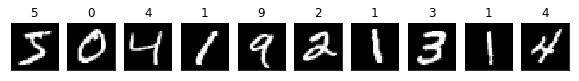

In [4]:
# First 13 images:
fig = plt. figure(figsize=(10,10))
for i in range (10):
    ax = fig.add_subplot(1, 10, i + 1, xticks = [], yticks =[])
    ax.imshow(x_train[i], cmap = 'gray')
    ax.set_title(str(y_train[i]))

In [5]:
# Each entry contains data on each pixel for each point present in the matrix.
# The picture is the matrix. Each pixel appears as a number between 255 (white)
# and 0 at the other end of the spectrum for black. Gray is in between.

In [6]:
# Normalizing / resizing
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
# Images need to be pre-processed into one hot encoded vectors.
# These vectors represent the images as different catagories where 
# the vector contains a 1 or 0 stating whether it is in the class
# that corresponds to the 1 or 0 in that column.
# One hot encoder:

In [8]:
# Pre encoding:
print('Integer-valued labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]


In [9]:
# Dependency:
from keras.utils import np_utils

In [10]:
# Encoding step
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [11]:
# Post encoding:
print('One-hot labels:')
print(y_train[:13])

One-hot labels:
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]]


In [12]:
# This isn't enough, Multilayer perceptrons only take vectors as inputs.
# This means our matrices need to be flattened to be converted to vectors
# The patterns will still exist across the vector.

In [13]:
# Discovering patterns in our data
# We have 784 entries, so we need 784 input nodes
# We will develop 2 hidden layers with 512 nodes.
# Output will depict 10 different digets so it should have 10 nodes.
# Softmax will be an ok equation to use here.

In [14]:
# Imports
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

In [15]:
# Define our model
model = Sequential()
model.add(Flatten(input_shape= x_train.shape[1:]))
model.add(Dense(512))
model.add(Dense(512))
model.add(Dense(10, activation= 'softmax'))

#summary of the model:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [16]:
# We can add a RELU function to our hidden layer to improve our model.
# This will help with vanishing gradient problems.

# Define our model
model = Sequential()
model.add(Flatten(input_shape= x_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation= 'softmax'))

#summary of the model:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Dropout layers should be added to prevent overfitting the resulting model.

# Define our model
model = Sequential()
model.add(Flatten(input_shape= x_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation= 'softmax'))

#summary of the model:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [18]:
# We need to specify a loss function.
# We should use a catagorical cross entropy loss function because we're doing
# a catagorical estimation.
# THIS means that when we have our prediction outputs, the loss function will
# Punish wrong probabilities a lot and punish correct probabilities more.
# Our loss function needs to use an optimizer function.

In [19]:
# Loss function
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [20]:
# Pre training accuracy test:

#score
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

#print output:
print('Pre-trained accuracy: %.4f%%' % accuracy)

Pre-trained accuracy: 14.8800%


In [21]:
# Sweet so it's terrible.
# We need to train it.
# Import
from keras.callbacks import ModelCheckpoint

In [22]:
# model training:

# This means we only save the best model at that path
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', verbose = 1,
                               save_best_only=True)
# save the history!

hist = model.fit(x_train, y_train, batch_size=128, epochs = 10, 
                validation_split=0.2, callbacks = [checkpointer],
                verbose = 2, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
Epoch 00000: val_loss improved from inf to 0.12947, saving model to mnist.model.best.hdf5
7s - loss: 0.2751 - acc: 0.9149 - val_loss: 0.1295 - val_acc: 0.9597
Epoch 2/10
Epoch 00001: val_loss improved from 0.12947 to 0.08939, saving model to mnist.model.best.hdf5
7s - loss: 0.1134 - acc: 0.9655 - val_loss: 0.0894 - val_acc: 0.9745
Epoch 3/10
Epoch 00002: val_loss did not improve
7s - loss: 0.0754 - acc: 0.9771 - val_loss: 0.0910 - val_acc: 0.9747
Epoch 4/10
Epoch 00003: val_loss did not improve
7s - loss: 0.0633 - acc: 0.9811 - val_loss: 0.0902 - val_acc: 0.9765
Epoch 5/10
Epoch 00004: val_loss improved from 0.08939 to 0.08549, saving model to mnist.model.best.hdf5
7s - loss: 0.0510 - acc: 0.9847 - val_loss: 0.0855 - val_acc: 0.9785
Epoch 6/10
Epoch 00005: val_loss did not improve
7s - loss: 0.0440 - acc: 0.9860 - val_loss: 0.0948 - val_acc: 0.9782
Epoch 7/10
Epoch 00006: val_loss did not improve
7s - loss: 0.0377 - acc: 0.98

In [23]:
# It's almost never clear how many nodes, layers, epochs, etc you should use
# Many decisions need to be made into designing the architecture
# We use a training set, validation set, and test set
# Training is used to fit the weights, validation to check how the model is doing
# and test to check the accuracy of the model
# This way we can look for overfitting between training and epoch data sets
# This is useful when you have multiple architectures to compare things to
# Pick the model with the lowest validation loss.
# We create the test set to look at data we have never seen before.

In [25]:
# Let's see how we did:

#load the weights that yielded the best validation accuracy:
model.load_weights('mnist.model.best.hdf5')

In [26]:
#evaluation of test accuracy:

score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100 * score[1]

#print out accuracy
print('test accuracy: %.3f%%' %accuracy)

test accuracy: 98.150%


In [27]:
#Killing it